In [2]:
import pandas as pd
# import cugraph as cnx
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
from collections import Counter, defaultdict
import plotly.graph_objects as go
from multiprocessing import Pool
import numpy as np
from itertools import combinations

from netwulf import visualize
import netwulf as nw
import matplotlib.pyplot as plt

In [2]:
R = pd.read_pickle("edgelist_reindexed.pkl")

In [3]:
sanc = pd.read_csv("sanctioned_russians.csv")
R._start_name = R._start_name.str.lower()
sanc.Name = sanc.Name.str.lower()

## Influence Size of top Intermediaries

In [301]:
ENT  = R[R._start.isin(sanc_id) & (R._end_type == "Entity")]._end.unique()
INT  = R[(R._start_type == "Intermediaries") & (R._end.isin(ENT))]._start.unique()
R_Int = R[(R._start.isin(INT))]

int2entcount = R_Int._start.value_counts()
int2entcount = dict(zip(int2entcount.index.values, int2entcount.values))

In [302]:
int2offcount = {}
for s in INT:
    ent_s = R_Int[R_Int._start == s]._end.values
    int2offcount[s] = len( R[(R._end.isin(ent_s)) & (R._start_type == "Officers")])

In [318]:
R_Int = R[(R._start.isin(INT2))]

int2entcount = R_Int._start.value_counts()
int2entcount = dict(zip(int2entcount.index.values, int2entcount.values))

int2offcount = {}
for s in INT2:
    ent_s = R_Int[R_Int._start == s]._end.values
    int2offcount[s] = len( R[(R._end.isin(ent_s)) & (R._start_type == "Officers")])

In [319]:
int_df = []
for i,s in enumerate(INT2):
    row = [s, id2name[s], len([i for i in MSP2.neighbors(s) if id2type[i] == "Oligarch"]), 
           int2entcount[s], int2offcount[s]]
    int_df.append(row)

    print(s, id2name[s])

781338 American Corporate Services, Inc.
1120314 Appleby Services (Bermuda) Ltd.
223839 CONSULCO INTERNATIONAL LIMITED
1120359 Appleby Trust (Isle of Man) Limited
218283 MARKOM MANAGEMENT LTD
780541 Lotus Holding Company Limited
216319 DIETRICH, BAUMGARTNER & PARTNER
216903 BRIDGEWATERS (IOM) LIMITED
780670 G.S.L. Law & Consulting
780680 I&T Consulting Ltd. ( DIFFERENT SHIP TO ADDRESS SEE MASTER CLIENT)
223643 RYON LTD.
1590238 CHRISTODOULOS VASSILIADES
217073 DR. K. CHRYSOSTOMIDES & CO.
781297 Andersen Business Services, Inc.


In [353]:
int_df = pd.DataFrame(int_df, columns = ["node_id","Intermediary", "Num. Oligarchs", 
                                         "Num. Entities", "Num. Clients" ])
int_df.Intermediary = int_df.Intermediary.apply(lambda x: rename.get(x,x))
int_df["Order"] = int_df.node_id.apply(lambda x: x in INT)
int_df.sort_values(["Order", "Num. Clients" ], ascending = False, inplace=True)
int_df = int_df.reset_index(drop=True)
n_id2tableID = dict(zip(int_df.node_id.values,  int_df.index.values))

In [354]:
int_df

node_id                         Intermediary  Num. Oligarchs  \
0   1120314      Appleby Services (Bermuda) Ltd.               2   
1    780670              G.S.L. Law & Consulting               3   
2    780541        Lotus Holding Company Limited               1   
3    781297     Andersen Business Services, Inc.               1   
4    216903                  Bridgewater Limited               1   
5    223643                            Ryon Ltd.               2   
6    781338    American Corporate Services, Inc.               4   
7    780680                  I&T Consulting Ltd.               3   
8    218283               Markom Management Ltd.               6   
9    217073          Dr. K. Chrysostomides & Co.               2   
10   216319      Dietrich, Baumgartner & Partner               1   
11   223839          Consulco International Ltd.               2   
12  1120359  Appleby Trust (Isle of Man) Limited               4   
13  1590238            Christodoulos Vassiliades               1   

    Num. Entities  Num. Clients  Order  
0            3645         72316   True  
1            2097          3487   True  
2            1218          2797   True  
3             521          1350   True  
4             200           666   True  
5             305           620   True  
6             311           540   True  
7             138           483   True  
8             140           369   True  
9              69           207   True  
10             41           162   True  
11           3168          5499  False  
12            458          3566  False  
13            287           562  False

In [321]:
rename={"BRIDGEWATERS (IOM) LIMITED":"Bridgewater Limited",
       "RYON LTD.": "Ryon Ltd.", 
        "I&T Consulting Ltd. ( DIFFERENT SHIP TO ADDRESS SEE MASTER CLIENT)": "I&T Consulting Ltd.",
       "MARKOM MANAGEMENT LTD": "Markom Management Ltd.",
      'DR. K. CHRYSOSTOMIDES & CO.': "Dr. K. Chrysostomides & Co.",
      'DIETRICH, BAUMGARTNER & PARTNER': "Dietrich, Baumgartner & Partner",
       "CONSULCO INTERNATIONAL LIMITED": "Consulco International Ltd.",
       "CHRISTODOULOS VASSILIADES": "Christodoulos Vassiliades"}

In [369]:
int_df

node_id                         Intermediary  Num. Oligarchs  \
0   1120314      Appleby Services (Bermuda) Ltd.               2   
1    780670              G.S.L. Law & Consulting               3   
2    780541        Lotus Holding Company Limited               1   
3    781297     Andersen Business Services, Inc.               1   
4    216903                  Bridgewater Limited               1   
5    223643                            Ryon Ltd.               2   
6    781338    American Corporate Services, Inc.               4   
7    780680                  I&T Consulting Ltd.               3   
8    218283               Markom Management Ltd.               6   
9    217073          Dr. K. Chrysostomides & Co.               2   
10   216319      Dietrich, Baumgartner & Partner               1   
11   223839          Consulco International Ltd.               2   
12  1120359  Appleby Trust (Isle of Man) Limited               4   
13  1590238            Christodoulos Vassiliades               1   

    Num. Entities  Num. Clients  Order  
0            3645         72316   True  
1            2097          3487   True  
2            1218          2797   True  
3             521          1350   True  
4             200           666   True  
5             305           620   True  
6             311           540   True  
7             138           483   True  
8             140           369   True  
9              69           207   True  
10             41           162   True  
11           3168          5499  False  
12            458          3566  False  
13            287           562  False

C:\Users\User\anaconda3\envs\networks\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


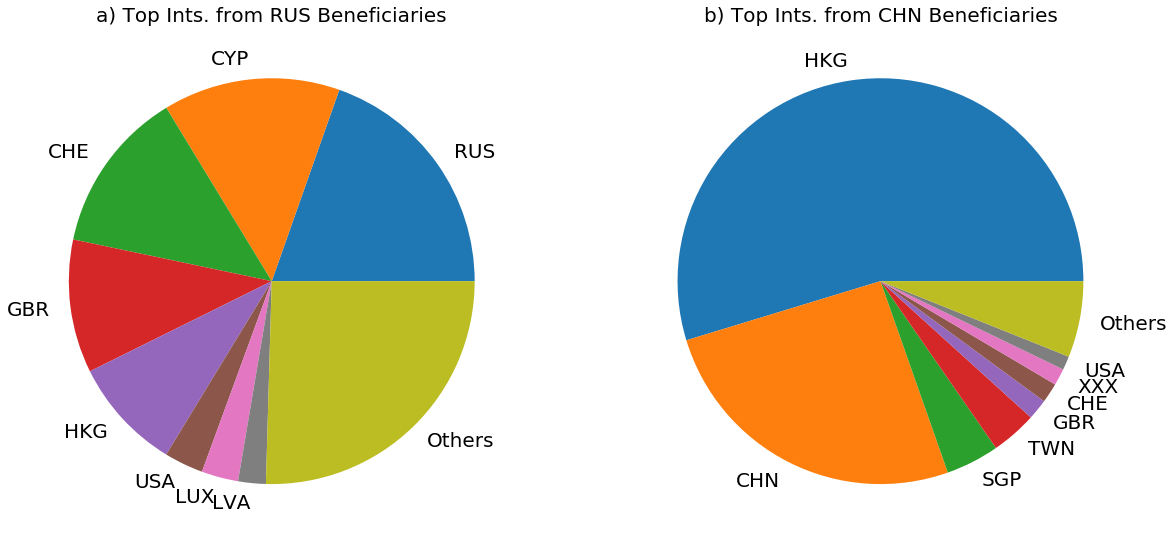

In [394]:
plt.figure(figsize=(20,10))
lets = ["a", "b"]

for i, cc in enumerate(["RUS", "CHN"]):
    ENTS = R[(R._start_country == cc) & (R._start_type == "Officers")]._end.unique()
    INTS = R[(R._start_type == "Intermediaries") & (R._end.isin(ENTS))]
    INTS = INTS.drop_duplicates("_start")

    R_2 = INTS.copy()
    top_ind = 8
    R_2 = R_2[ (~R_2._start_country.isna()) & (~R_2._end_country.isna())]
    R_2._start_country = R_2._start_country.apply(lambda x: x.split(";"))
    R_2._end_country   = R_2._end_country.apply(lambda x: x.split(";"))
    R_2["tups"] = R_2.apply(lambda r: list( product(r._start_country, r._end_country ) ), axis = 1 )
    flat_list = [item for sublist in R_2["tups"].values for item in sublist]
    EL_IE = [ (k[0],k[1],v) for k,v in Counter( flat_list ).items() ]
    EL_IE = pd.DataFrame(EL_IE, columns=["Intemediary","entity","counts"])
    EL_IE = EL_IE.sort_values("counts", ascending=False).reset_index(drop=True)
    C1 = EL_IE.groupby("Intemediary")[["counts"]].sum().sort_values("counts", ascending = False).reset_index()
    C2 = C1.iloc[:top_ind]
    C2.loc[top_ind] = ["Others", C1.iloc[top_ind:].counts.sum()]

    plt.subplot(1,2,i+1)
    plt.pie(C2.counts, labels = C2.Intemediary, textprops = {"fontsize":20})
    plt.title(f"{lets[i]}) Top Ints. from {cc} Beneficiaries", fontsize=20)
    
plt.savefig("figures/rus_vs_chn.png", bbox_inches="tight")

In [405]:
hit_list = ["RUS", "USA", "CHN", 'HKG', "CHE"]
HH_list  = []
for i, cc in enumerate(hit_list):
    ENTS = R[(R._start_country == cc) & (R._start_type == "Officers")]._end.unique()
    INTS = R[(R._start_type == "Intermediaries") & (R._end.isin(ENTS))]
    INTS = INTS.drop_duplicates("_start")

    R_2 = INTS.copy()
    top_ind = 8
    R_2 = R_2[ (~R_2._start_country.isna()) & (~R_2._end_country.isna())]
    R_2._start_country = R_2._start_country.apply(lambda x: x.split(";"))
    R_2._end_country   = R_2._end_country.apply(lambda x: x.split(";"))
    R_2["tups"] = R_2.apply(lambda r: list( product(r._start_country, r._end_country ) ), axis = 1 )
    flat_list = [item for sublist in R_2["tups"].values for item in sublist]
    EL_IE = [ (k[0],k[1],v) for k,v in Counter( flat_list ).items() ]
    EL_IE = pd.DataFrame(EL_IE, columns=["Intemediary","entity","counts"])
    EL_IE = EL_IE.sort_values("counts", ascending=False).reset_index(drop=True)
    
    HH_list.append([cc, HH_index(EL_IE)])
HH_list = pd.DataFrame(HH_list, columns = ["country", "hh"])

In [407]:
HH_list.sort_values("hh", inplace=True, ascending = False)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

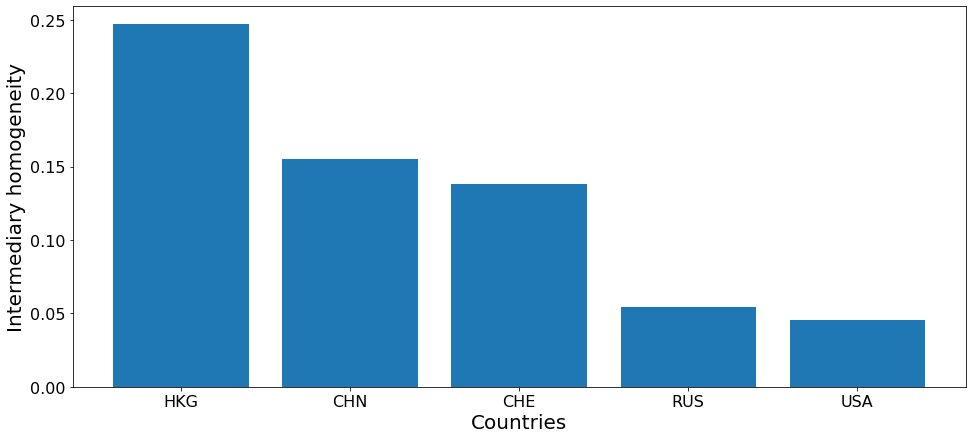

In [410]:
plt.figure(figsize=(16,7))

plt.bar(range(len(hit_list)), HH_list.hh.values)
plt.xticks(range(len(hit_list)), HH_list.country)
plt.xlabel("Countries", fontsize=20)
plt.ylabel("Intermediary homogeneity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## Sankey

In [411]:
def create_meso_EL(df):
    df._start_country = df._start_country.apply(lambda x: x.split(";"))
    df._end_country   = df._end_country.apply(lambda x: x.split(";"))
    df["tups"] = df.apply(lambda r: list(product(r._start_country, r._end_country)), axis = 1)
    df = [item for sublist in df["tups"].values for item in sublist]
    return [ (k[0],k[1],v) for k,v in Counter( df ).items() ]

def get_sankey(country, num_id = 8):
    ent_ids = R_1._end.unique()
    F1 = R[(R._start_type == "Intermediaries") & (R._end_type == "Entity") 
            & (R._end.isin(ent_ids))]
    F1 = F1[ (~F1._start_country.isna()) & (~F1._end_country.isna())]
    F2 = R[(R._start_type == "Entity") & (R._end_type == "Address") 
            & (R._start.isin(ent_ids))]
    F2 = F2[ (~F2._start_country.isna()) & (~F2._end_country.isna())]

    num_id = 12
    F1 = create_meso_EL(F1)
    F2 = create_meso_EL(F2)
    F1 = pd.DataFrame(F1, columns = [1,2,3])
    F2 = pd.DataFrame(F2, columns = [1,2,3])
    top_F1_v1 = F1.groupby(1)[[3]].sum().sort_values(3, ascending=False).iloc[:num_id].index
    top_F1_v2 = F1.groupby(2)[[3]].sum().sort_values(3, ascending=False).iloc[:num_id].index
    top_F2_v1 = F2.groupby(1)[[3]].sum().sort_values(3, ascending=False).iloc[:num_id].index
    top_F2_v2 = F2.groupby(2)[[3]].sum().sort_values(3, ascending=False).iloc[:num_id].index
    top_mid = set(np.hstack((top_F1_v2, top_F2_v1)))

    F1_top  = F1[ (F1[1].isin(top_F1_v1)) & (F1[2].isin(top_mid))]
    F2_top  = F2[ (F2[1].isin(top_mid)) & (F2[2].isin(top_F2_v2))]

    F1_labs_v1, F1_factors_v1 = pd.factorize(F1_top[1])
    __, F1_factors_v2 = pd.factorize(np.hstack((F1_top[2], F2_top[1]) ))

    v2_reindex = (max(F1_labs_v1)+1)
    midLab2IDs = dict(zip(F1_factors_v2, range(v2_reindex, v2_reindex+len(top_mid))))
    F1_labs_v2 = F1_top[2].apply(lambda x: midLab2IDs[x]).values
    F2_labs_v1 = F2_top[1].apply(lambda x: midLab2IDs[x]).values


    F2_labs_v2, F2_factors_v2 = pd.factorize(F2_top[2])
    F2_labs_v2 += (max(midLab2IDs.values()) + 1)
    
    labels = np.hstack((F1_factors_v1, F1_factors_v2, F2_factors_v2))
    colors = ["blue"]*len(F1_factors_v1) + ["green"]*len(F1_factors_v2) + ["red"]*len(F2_factors_v2)
    
    source = np.hstack((F1_labs_v1, F2_labs_v1))
    target = np.hstack((F1_labs_v2, F2_labs_v2))
    values = np.hstack((F1_top[3],  F2_top[3]))

    plot_sankey(labels, colors, source, target, values, country)

def plot_sankey(labels, colors, source, target, values, country):
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label = labels,
          color = colors
        ),
        link = dict(
          source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = target,
          value = values
      ))])

    for x_coordinate, column_name in enumerate(["Intemediary","Entity","Address"]):
        fig.add_annotation(
              x=x_coordinate,
              y=1.05,
              xref="x",
              yref="paper",
              text=column_name,
              showarrow=False,
              font=dict(
                  family="Courier New, monospace",
                  size=20,
                  color="tomato"
                  ),
              align="center",
              )

    fig.update_layout(
      title_text=f"Intemediary-Entity-Address Structure of Oligrachs", 
      xaxis={
      'showgrid': False, # thin lines in the background
      'zeroline': False, # thick line at x=0
      'visible': False,  # numbers below
      },
      yaxis={
      'showgrid': False, # thin lines in the background
      'zeroline': False, # thick line at x=0
      'visible': False,  # numbers below
      }, plot_bgcolor='rgba(0,0,0,0)', font_size=15)

    fig.show()
#     fig.write_image(f"figures/sankey/Oligrachs.png", engine="orca")

In [31]:
get_sankey("RUS")